In [ ]:
!pip install pyspark py4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=08e55415036a4c3b411db8c7fcab1c951ffa78e917a0f3d0216d730472320c73
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

sp = (SparkSession.builder.appName('TestProg').getOrCreate()) #spark session

In [ ]:
test_list = '12 11 12 11 121 1 1111 112 112'.split(' ') # a list that will be used to put values into the rdd.
type(test_list)
print(test_list)

['12', '11', '12', '11', '121', '1', '1111', '112', '112']


In [ ]:
my_rdd = sp.sparkContext.parallelize(test_list) # storing the list to a rdd using sparkContext.

In [ ]:
res_list = my_rdd.collect()

for i in res_list:
  print(i)

12
11
12
11
121
1
1111
112
112


In [ ]:
type(res_list)

list

distinct() function on rdd to fetch only the unique values from the rdd.

In [ ]:
# a new rdd is created that will hold the unique values from the rdd.
new_rdd = my_rdd.distinct()

In [ ]:
res_list2 = new_rdd.collect() # collect() method to store the values from the rdd into a list.

# using for loop to print the values of the rdd.
for i in res_list2:
  print(i)

12
121
1
112
11
1111


# Applying filter on RDD

In [ ]:
# Example list
test_list = [23,24,24,67,34,12]

# Create an RDD from the list
my_rdd2 = sp.sparkContext.parallelize(test_list)

# Define the function to filter even numbers
def myfunc(el):
    return el % 2 == 0

# Use the filter method with the corrected function
result = my_rdd2.filter(myfunc).collect()

# Print the result
print(result)


[24, 24, 34, 12]




# Applying Map transformation on RDD


In [ ]:
!pip install matplotlib pandas seaborn

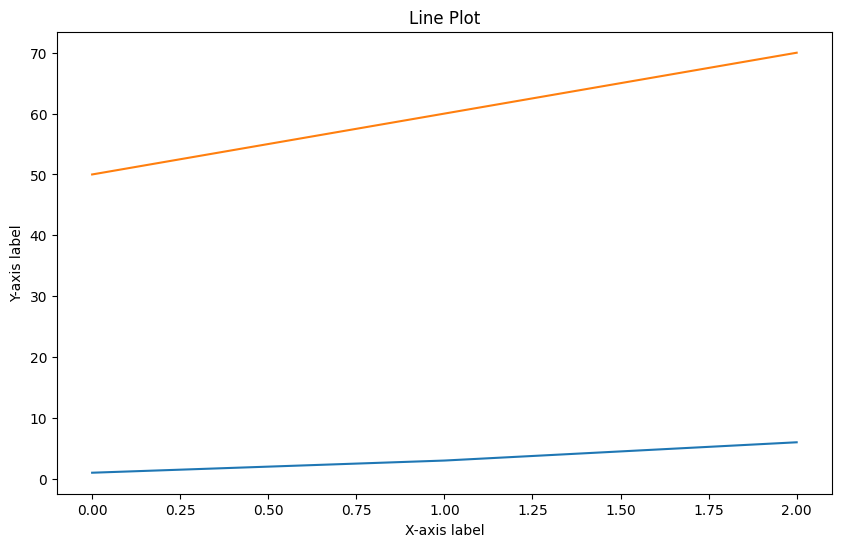

In [ ]:
# visulizing the data from the CSV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Replace 'file_path.csv' with the path to your CSV file
df = pd.read_csv('/content/data.csv')


# Example 1: Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Line Plot')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()


In [ ]:
#lst = [4,5,6,7]
rdd = sp.sparkContext.parallelize(lst)
trnsformed = rdd.map(lambda x: x*2)
new_lst = trnsformed.collect()
print(new_lst)

[8, 10, 12, 14]


# Applying Map transformation on a CSV

In [ ]:
# Importing the necessary library
import pandas as pd

# Reading the CSV file into a DataFrame
# The 'header=True' parameter indicates that the first row of the CSV file contains column names
df = pd.read_csv('/content/data.csv', header=True)

# Defining a function 'extract' that takes a row as input and returns a tuple with two values:
# - feature1 converted to a float
# - feature2 converted to a float
def extract(row):
    return (float(row['feature1']),
            float(row['feature2']))

# Converting the DataFrame to an RDD (Resilient Distributed Dataset) and applying the 'extract' function to each row
rdd = df.rdd.map(extract)

# Defining a function 'normalize' that takes a row (a tuple with two float values) as input
# It tries to normalize the values:
# - Divides the first value by 10
# - Divides the second value by 100
# If a TypeError occurs (e.g., if the values are not numeric), it returns a tuple with (0,0)
def normalize(row):
    try:
        return (row[0]/10, row[1]/100)
    except TypeError:
        return (0, 0)

# Applying the 'normalize' function to each row in the RDD
rdd_norm = rdd.map(normalize)

# Collecting the normalized RDD back to the driver program as a list of tuples
normalized_data = rdd_norm.collect()

# Printing each tuple in the collected normalized data
for i in normalized_data:
    print(i)


(0.1, 0.5)
(0.3, 0.6)
(0.6, 0.7)


In [ ]:
# flatMap in pyspark
inp_rdd = sp.sparkContext.parallelize(["hi there","this is pyspark"])
output_rdd = inp_rdd.flatMap(lambda l: l.split(' '))

lst = output_rdd.collect()

print(lst)

['hi', 'there', 'this', 'is', 'pyspark']


#SortByKey Transformation

In [ ]:

country_list = [('India',11),('Austrelia',56),('USA',5),('Japan',34)]
#creating a rdd
country_rdd = sp.sparkContext.parallelize(country_list)

In [ ]:
# sorting the countries using the country name
sorted_country_list = country_rdd.sortByKey().collect()

In [ ]:
for i in sorted_country_list:
  print(i)

('Austrelia', 56)
('India', 11)
('Japan', 34)
('USA', 5)


In [ ]:
# sorting the country list by numbers in ascending order
srted_c_list_bynum = country_rdd.map(lambda c: (c[1], c[0])).sortByKey().collect()

In [ ]:
# sorting the country list by numbers in descending order
srted_c_list_bynum = country_rdd.map(lambda c: (c[1], c[0])).sortByKey(False).collect()

In [ ]:
for i in srted_c_list_bynum:
  print(i)

(5, 'USA')
(11, 'India')
(34, 'Japan')
(56, 'Austrelia')
